## Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
text = """No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than man's and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied, perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water. With infinite complacency men went to and fro over this globe about their little affairs, serene in their assurance of their empire over matter. It is possible that the infusoria under the microscope do
the same. No one gave a thought to the older worlds of space as sources of human danger, or thought of them only to dismiss the idea of life upon them as impossible or improbable. It is curious to recall some of the mental habits of those departed days. At most terrestrial men fancied there might be other men upon Mars, perhaps inferior to themselves and ready to welcome a missionary enterprise. Yet across the gulf of space, minds that are to our minds as ours are to those of the beasts that perish, intellects vast and cool and unsympathetic, regarded this earth with envious eyes, and slowly and surely drew their plans against us. And early in the twentieth century came the great disillusionment.
"""
print(text)

No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than man's and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied, perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water. With infinite complacency men went to and fro over this globe about their little affairs, serene in their assurance of their empire over matter. It is possible that the infusoria under the microscope do
the same. No one gave a thought to the older worlds of space as sources of human danger, or thought of them only to dismiss the idea of life upon them as impossible or improbable. It is curious to recall some of the mental habits of those departed days. At most terrestrial men fancied there might be other men upon Mars, perhaps inferior to themselves and ready to welcome 

In [3]:
# minusculas y Tokenize the text(palabaras individuales)
lower = text.lower()
tokens = word_tokenize(lower)
print(f'\nNº palabras: {len(tokens)}')
print(tokens)


Nº palabras: 249
['no', 'one', 'would', 'have', 'believed', 'in', 'the', 'last', 'years', 'of', 'the', 'nineteenth', 'century', 'that', 'this', 'world', 'was', 'being', 'watched', 'keenly', 'and', 'closely', 'by', 'intelligences', 'greater', 'than', 'man', "'s", 'and', 'yet', 'as', 'mortal', 'as', 'his', 'own', ';', 'that', 'as', 'men', 'busied', 'themselves', 'about', 'their', 'various', 'concerns', 'they', 'were', 'scrutinised', 'and', 'studied', ',', 'perhaps', 'almost', 'as', 'narrowly', 'as', 'a', 'man', 'with', 'a', 'microscope', 'might', 'scrutinise', 'the', 'transient', 'creatures', 'that', 'swarm', 'and', 'multiply', 'in', 'a', 'drop', 'of', 'water', '.', 'with', 'infinite', 'complacency', 'men', 'went', 'to', 'and', 'fro', 'over', 'this', 'globe', 'about', 'their', 'little', 'affairs', ',', 'serene', 'in', 'their', 'assurance', 'of', 'their', 'empire', 'over', 'matter', '.', 'it', 'is', 'possible', 'that', 'the', 'infusoria', 'under', 'the', 'microscope', 'do', 'the', 'same'

Como quedan simbolos los eliminaremos para poder seguir sin estos.

In [4]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

# Tokens sin símbolos
words = tokenizer.tokenize(lower)

print(f'\nNº palabra sin símbolos: {len(words)}')
print(words)


Nº palabra sin símbolos: 232
['no', 'one', 'would', 'have', 'believed', 'in', 'the', 'last', 'years', 'of', 'the', 'nineteenth', 'century', 'that', 'this', 'world', 'was', 'being', 'watched', 'keenly', 'and', 'closely', 'by', 'intelligences', 'greater', 'than', 'man', 's', 'and', 'yet', 'as', 'mortal', 'as', 'his', 'own', 'that', 'as', 'men', 'busied', 'themselves', 'about', 'their', 'various', 'concerns', 'they', 'were', 'scrutinised', 'and', 'studied', 'perhaps', 'almost', 'as', 'narrowly', 'as', 'a', 'man', 'with', 'a', 'microscope', 'might', 'scrutinise', 'the', 'transient', 'creatures', 'that', 'swarm', 'and', 'multiply', 'in', 'a', 'drop', 'of', 'water', 'with', 'infinite', 'complacency', 'men', 'went', 'to', 'and', 'fro', 'over', 'this', 'globe', 'about', 'their', 'little', 'affairs', 'serene', 'in', 'their', 'assurance', 'of', 'their', 'empire', 'over', 'matter', 'it', 'is', 'possible', 'that', 'the', 'infusoria', 'under', 'the', 'microscope', 'do', 'the', 'same', 'no', 'one',

In [5]:
#FRECUENCIA
# Calcular la frecuencia de palabras
frecuencia = FreqDist(words)

print("Palabras más frecuentes:")
for palabra, count in frecuencia.most_common(10):
    print(f"{palabra}: {count}")

Palabras más frecuentes:
the: 13
of: 11
and: 11
as: 8
to: 8
that: 6
their: 5
a: 5
in: 4
men: 4


las palabras más comunes que aparecen son stopwords.

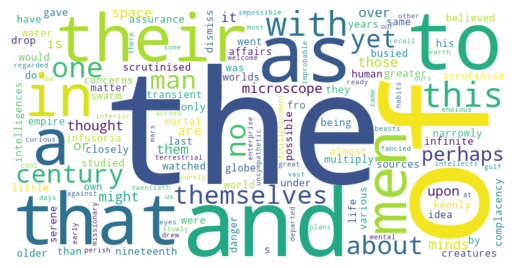

In [9]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(frecuencia)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [12]:
import nltk
nltk.download('stopwords')

#Remove stop words - palabras vacías que son consideradas como términos que generalmente no aportan un significado importante para el análisis
filtered_tokens = [token for token in words if token not in stopwords.words('english')]
print(f'\nNº palabras sin stopwords: {len(filtered_tokens)}')

print(" ".join(filtered_tokens))


Nº palabras sin stopwords: 112
one would believed last years nineteenth century world watched keenly closely intelligences greater man yet mortal men busied various concerns scrutinised studied perhaps almost narrowly man microscope might scrutinise transient creatures swarm multiply drop water infinite complacency men went fro globe little affairs serene assurance empire matter possible infusoria microscope one gave thought older worlds space sources human danger thought dismiss idea life upon impossible improbable curious recall mental habits departed days terrestrial men fancied might men upon mars perhaps inferior ready welcome missionary enterprise yet across gulf space minds minds beasts perish intellects vast cool unsympathetic regarded earth envious eyes slowly surely drew plans us early twentieth century came great disillusionment


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nuria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
frecuencia2= FreqDist(filtered_tokens)
print("Palabras más frecuentes sin stopwords:")
for palabra, count in frecuencia2.most_common(10):
    print(f"{palabra}: {count}")

Palabras más frecuentes sin stopwords:
men: 4
one: 2
century: 2
man: 2
yet: 2
perhaps: 2
microscope: 2
might: 2
thought: 2
space: 2


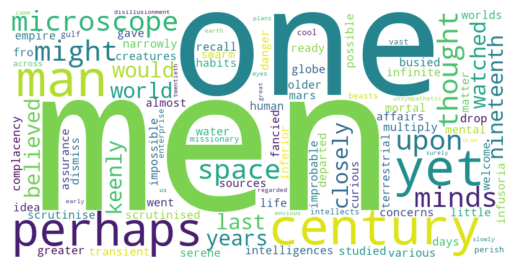

In [16]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(frecuencia2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Stemming
El stemming es un proceso en el procesamiento de lenguaje natural (PLN) que implica reducir una palabra a su forma base o raíz, eliminando sufijos y prefijos. El objetivo del stemming es reducir palabras derivadas a una forma común para que palabras relacionadas compartan la misma raíz, facilitando así la búsqueda y el análisis de texto.

In [13]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Crear un objeto PorterStemmer
stemmer = PorterStemmer()

# Aplicar stemming a cada palabra
palabras_stem = [stemmer.stem(palabra) for palabra in filtered_tokens]

# Join the tokens back into a string
processed_text = ' '.join(palabras_stem)
processed_text


'one would believ last year nineteenth centuri world watch keenli close intellig greater man yet mortal men busi variou concern scrutinis studi perhap almost narrowli man microscop might scrutinis transient creatur swarm multipli drop water infinit complac men went fro globe littl affair seren assur empir matter possibl infusoria microscop one gave thought older world space sourc human danger thought dismiss idea life upon imposs improb curiou recal mental habit depart day terrestri men fanci might men upon mar perhap inferior readi welcom missionari enterpris yet across gulf space mind mind beast perish intellect vast cool unsympathet regard earth enviou eye slowli sure drew plan us earli twentieth centuri came great disillusion'

##  Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

In [ ]:
import nltk
nltk.download('vader_lexicon')

# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    
    # Determine sentiment based on the compound score
    if scores['compound'] >= 0.05:
        sentiment = 'Positivo'
    elif scores['compound'] <= -0.05:
        sentiment = 'Negativo'
    else:
        sentiment = 'Neutral'
    
    return sentiment

# Example of how to use the get_sentiment function
sentiment_result = get_sentiment(processed_text)
print(f"Sentimiento: {sentiment_result}")

In [ ]:
scores = analyzer.polarity_scores(processed_text)
scores

- Negativo ('neg'): 8% sugiere que hay una pequeña presencia de contenido negativo.
- Neutral ('neu'): 80% indica que la mayoría del contenido es neutro.
- Positivo ('pos'): 12% indica que hay un componente positivo en el texto.
- Compound Score ('compound'): 0.6249. El puntaje compuesto es una combinación de los puntajes negativos, neutrales y positivos, normalizado a un rango entre -1 (muy negativo) y 1 (muy positivo). Un valor de 0.6249 sugiere que el texto tiende a ser positivo.